# Estimating Pi with Monte Carlo Simulation

Monte Carlo methods: A broad class of computational algorithms that rely on repeated random sampling to obtain numerical results

We can estimate the value of $\pi$ by finding the ratio of the area of a cricle and a square of known dimensions.

Using what we know about the formulas:
$$Area of Square = length \times length$$
$$Area of Circle = \pi \times radius^2$$

We define a circle with a unit radius and a unit square. We then enclose the first quadrant of the circle in the unit square.

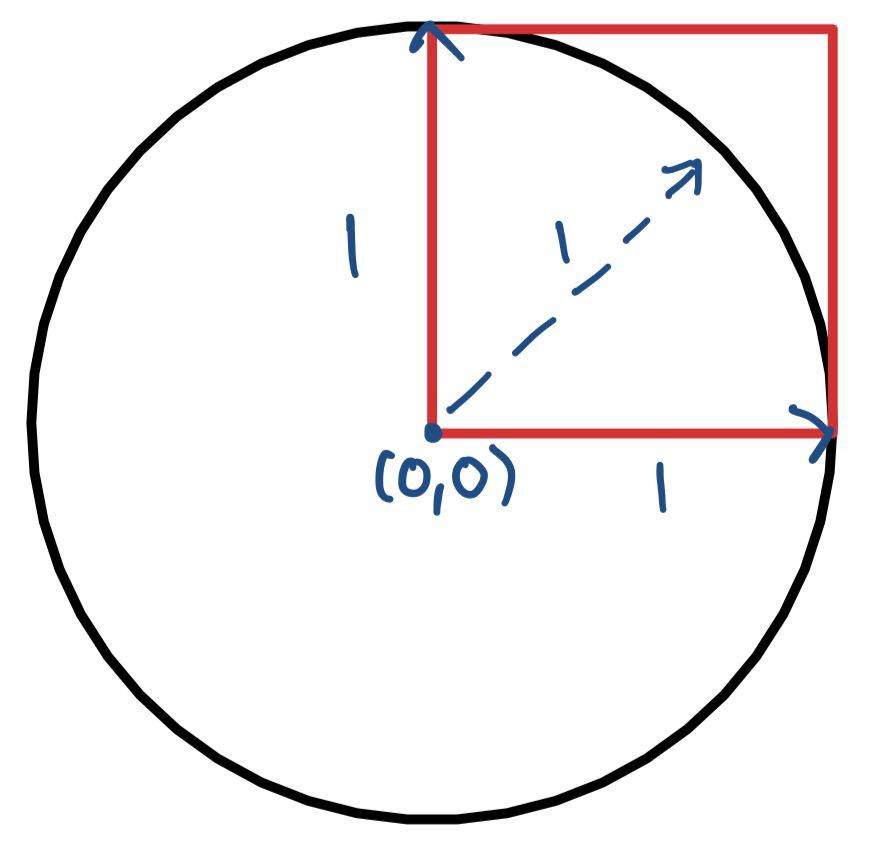

Focusing on the area enclosed by the square, if we uniformly generate random points within the square, we would expect some of them to land in the quadrant of the cricle and some of them to land outside of the quadrant in the rest of the square. The ratio of proportion of points that land in the quadrant to outside of the quadrant should be the same as the ratio of the area of the quadrant to the area of the rest of the square.

Let:
- N = total number of points generated
- p = number of points that land in the quadrant

$$ \frac{p}{N}  = \frac{AreaofQuadrant}{AreaofSquare} = \frac{\pi\times1^2 / 4}{1\times1} = \frac{\pi}{4}$$

Thus we can see that by randomly generating points in our square and counting the number of points that land in the quadrant, we can estimate the value of $pi$ by $$\pi \approx 4\times \frac{p}{N}$$

We define the coordinates for the bottom left corner of the unit square as the origin (0,0) and top right as (1,1). Thus, a generated point is within the quadrant if it has a euclidean distance to the origin <= 1.

In [109]:
import numpy as np


def generate_points(n: int):
    """
    returns a list of n points
    """
    return np.random.uniform(0, 1, size=(n,2))


def simulate(n: int):
    """
    generates n points
    returns p: number of points that land in the quadrant
    """
    points = generate_points(n)
    return (np.linalg.norm(points, axis=1) <= 1).sum()
              

## Plot

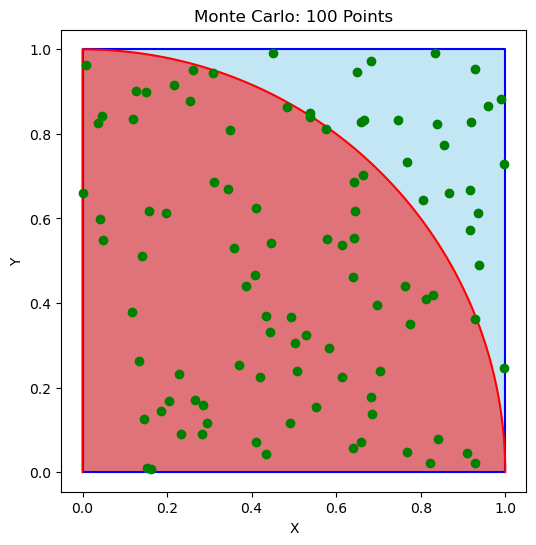

In [2]:
import matplotlib.pyplot as plt

# Define the coordinates of the square's vertices
square_vertices = [(0, 0), (1, 0), (1, 1), (0, 1), (0, 0)]  # Closing the square by repeating the first point

# Unpack the vertices into x and y coordinates for plotting
x, y = zip(*square_vertices)

# Define the circle's right quadrant within the square
theta = np.linspace(0, np.pi/2, 100)  # Angle from 0 to 90 degrees for the right quadrant
x_circle = np.append(np.cos(theta), [0])
y_circle = np.append(np.sin(theta), [0])

# Generate 100 points
points = generate_points(100)
x_points = points.T[0]
y_points = points.T[1]

# Create the plot
plt.figure(figsize=(6, 6))
plt.plot(x, y, 'b-', label='Square')  # Plot the square with blue lines
plt.fill(x, y, 'skyblue', alpha=0.5)  
plt.plot(x_circle, y_circle, 'r-', label='Circle Quadrant')  # Plot the circle's quadrant
plt.fill(x_circle, y_circle, 'red', alpha=0.5)  
plt.plot(x_points, y_points, 'go', label='Generated Points')  # Plot the circle's quadrant


# Set equal scaling for both axes to ensure the square appears as a square
plt.axis('equal')

# Set the title and labels
plt.title('Monte Carlo: 100 Points')
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot


plt.show()

## Animate

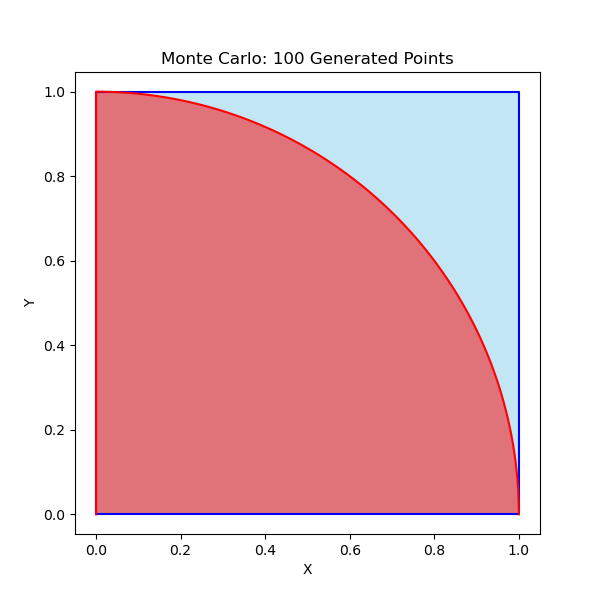

In [3]:
from matplotlib.animation import FuncAnimation
%matplotlib widget

# Define the square and circle as before
square_vertices = [(0, 0), (1, 0), (1, 1), (0, 1), (0, 0)]
x, y = zip(*square_vertices)
theta = np.linspace(0, np.pi/2, 100)
x_circle = np.append(np.cos(theta), [0])
y_circle = np.append(np.sin(theta), [0])

# Set up the figure and axis for plotting
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x, y, 'b-', label='Square')
ax.fill(x, y, 'skyblue', alpha=0.5)
ax.plot(x_circle, y_circle, 'r-', label='Circle Quadrant')
ax.fill(x_circle, y_circle, 'red', alpha=0.5)
ax.axis('equal')

# Title and labels
ax.set_title('Monte Carlo: 100 Generated Points')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Plot a single point to start with. This point will be updated in the animation.
points_plot, = ax.plot([], [], 'go', label='Generated Points')

# Initialization function for the animation
def init():
    points_plot.set_data([], [])
    return points_plot,


x_points, y_points = [], []


# Animation update function
def update(frame):
    pt = generate_points(1)[0]
    x_points.append(pt[0])
    y_points.append(pt[1])
    points_plot.set_data(x_points, y_points)
    return points_plot,

# Create the animation
ani = FuncAnimation(fig, update, frames=range(100), init_func=init, blit=True, repeat=False)

# plt.legend()
plt.show()

# ani.save('animation.gif', writer='pillow')

## Estimate Value of $\pi$

In [144]:
num_estimates = 20
num_points = 25_000

res = []
for _ in range(num_estimates):
    res.append(simulate(num_points))

estimates = np.array(res) * 4 / num_points
estimated_pi = np.mean(estimates)

print(res)
print(list(estimates))
print(f'Estimated Pi: {estimated_pi}')
print(f'Real Pi: {np.pi}')
print(f'Error: {np.abs(estimated_pi - np.pi) * 100/ np.pi:.4f}%')

[19695, 19627, 19675, 19562, 19702, 19656, 19648, 19623, 19614, 19775, 19608, 19664, 19520, 19583, 19603, 19678, 19631, 19713, 19620, 19657]
[3.1512, 3.14032, 3.148, 3.12992, 3.15232, 3.14496, 3.14368, 3.13968, 3.13824, 3.164, 3.13728, 3.14624, 3.1232, 3.13328, 3.13648, 3.14848, 3.14096, 3.15408, 3.1392, 3.14512]
Estimated Pi: 3.1428320000000003
Real Pi: 3.141592653589793
Error: 0.0394%


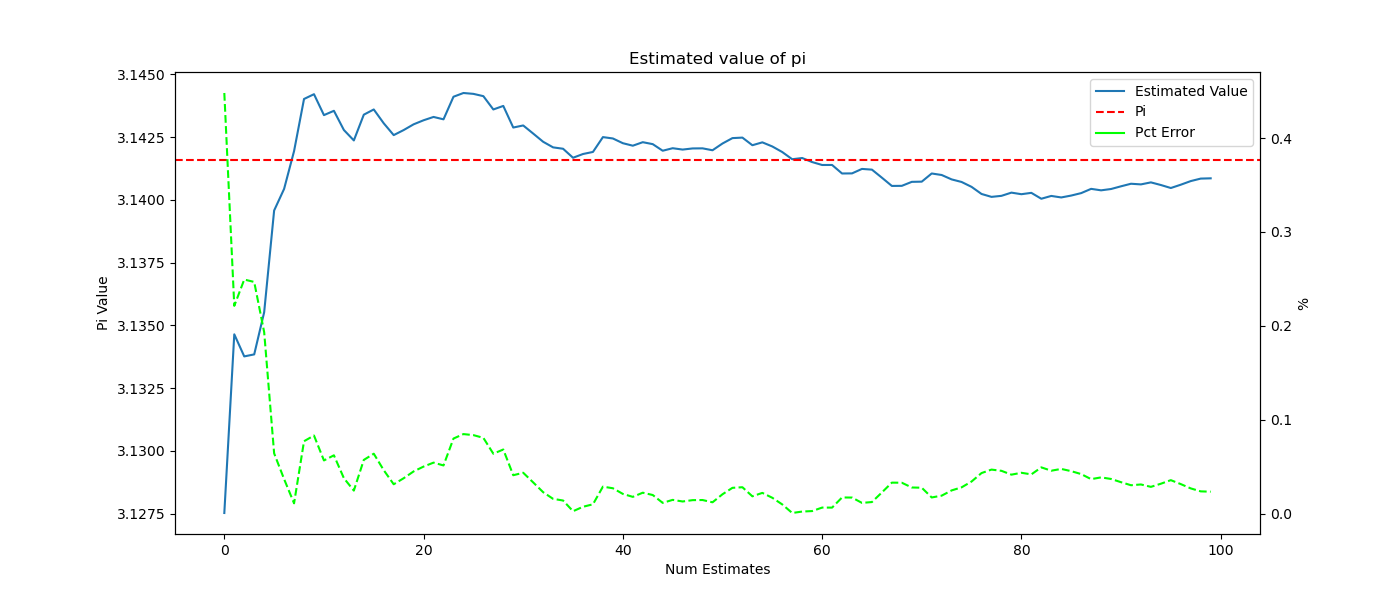

Final Estimated Value of Pi: 3.140856


In [139]:
num_estimates = 100
num_points = 25_000

res = []
estimates = []
for _ in range(num_estimates):
    res.append(simulate(num_points))
    estimates.append( 4 * np.mean(np.array(res) / num_points))


est_error = 100 * np.abs((np.array(estimates) - np.pi)) / np.pi

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(estimates, label='Estimated Value')
ax.axhline(y=np.pi, color='r', linestyle='--', label='Pi')
ax.plot([], [], 'lime', label = 'Pct Error')
ax.set_title('Estimated value of pi')
ax.set_ylabel('Pi Value')
ax.set_xlabel('Num Estimates')

ax2 = ax.twinx()
ax2.plot(est_error, color='lime', linestyle='--', label='Pct Error')
ax2.set_ylabel('%')

ax.legend()
plt.show()

print(f'Final Estimated Value of Pi: {estimates[-1]}')

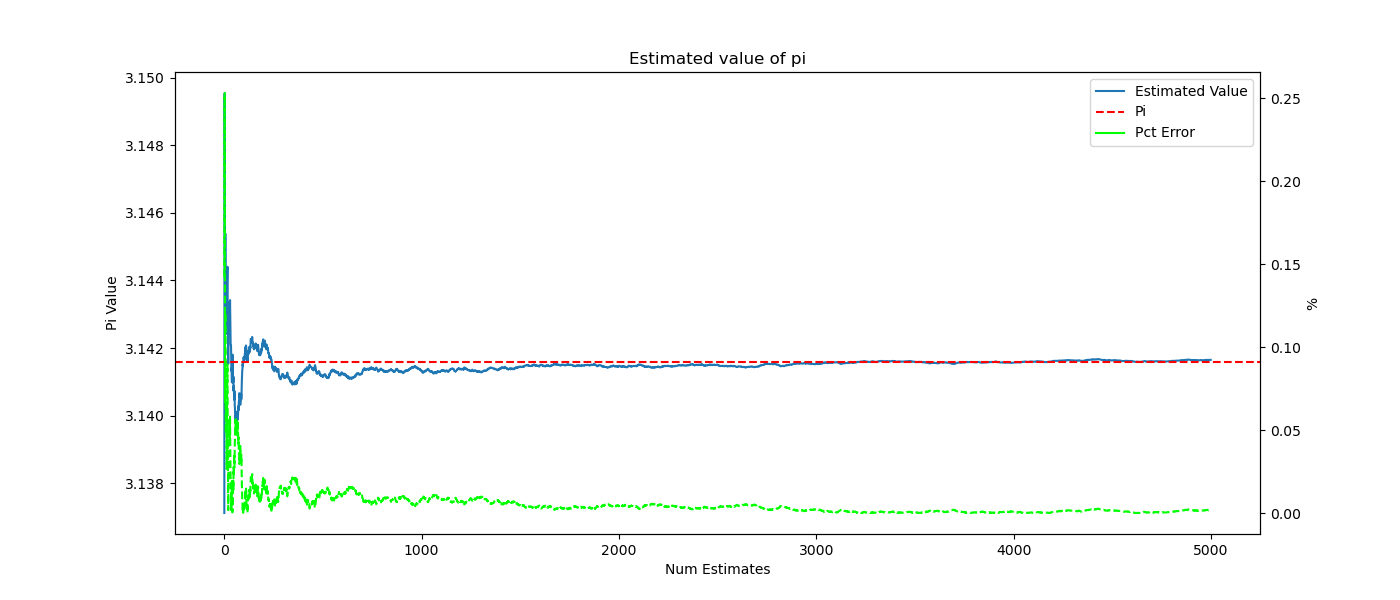

Final Estimated Value of Pi: 3.1416501759999997


In [140]:
num_estimates = 5000
num_points = 25_000

res = []
estimates = []
for _ in range(num_estimates):
    res.append(simulate(num_points))
    estimates.append( 4 * np.mean(np.array(res) / num_points))


est_error = 100 * np.abs((np.array(estimates) - np.pi)) / np.pi

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(estimates, label='Estimated Value')
ax.axhline(y=np.pi, color='r', linestyle='--', label='Pi')
ax.plot([], [], 'lime', label = 'Pct Error')
ax.set_title('Estimated value of pi')
ax.set_ylabel('Pi Value')
ax.set_xlabel('Num Estimates')

ax2 = ax.twinx()
ax2.plot(est_error, color='lime', linestyle='--', label='Pct Error')
ax2.set_ylabel('%')

ax.legend()
plt.show()

print(f'Final Estimated Value of Pi: {estimates[-1]}')